<a href="https://colab.research.google.com/github/hannahrfong/CSC713M/blob/main/Investigatory_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSC713M Investigatory Project**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats as sps

In [2]:
fie_df = pd.read_csv('https://raw.githubusercontent.com/hannahrfong/CSC713M/main/fie.csv')

# Dataset Description

## Brief Description

The Family Income and Expenditure (FIE) dataset is derived from the 2015 Family Income and Expenditure Survey (FIES) conducted by the Philippine Statistics Authority (PSA). The dataset provides data on the income and expenditure of Filipino households which can be used to formulate governmental policies and programs to elevate the socio-economic conditions of Filipinos.

## Dataset File Structure

The dataset contains 41,544 samples and 60 features. Each sample represents one Filipino household.

In [3]:
fie_df.shape

(41544, 60)

The list of features in the dataset and their corresponding data types can be generated by running the code below.

In [4]:
fie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

# Data Cleaning

The FIE dataset will undergo data cleaning to identify noisy, incomplete, and inconsistent data that can degrade the performance of machine learning models to be used with the dataset.

Specifically, the following aspects of the dataset will be checked:

*   Multiple Representations
*   Incorrect Datatypes
*   Default Values
*   Missing Data
*   Duplicate Data
*   Inconsistent Format









## Multiple Representations

The `unique` function is used to check if there exist different representations in the categorical features of the dataset.

In [5]:
for column in fie_df.select_dtypes(include="object"):
    print("'{}' unique values:\n".format(column), fie_df[column].unique())
    print("")

'Region' unique values:
 ['CAR' 'Caraga' 'VI - Western Visayas' 'V - Bicol Region' ' ARMM'
 'III - Central Luzon' 'II - Cagayan Valley' 'IVA - CALABARZON'
 'VII - Central Visayas' 'X - Northern Mindanao' 'XI - Davao Region'
 'VIII - Eastern Visayas' 'I - Ilocos Region' 'NCR' 'IVB - MIMAROPA'
 'XII - SOCCSKSARGEN' 'IX - Zasmboanga Peninsula']

'Main Source of Income' unique values:
 ['Wage/Salaries' 'Other sources of Income' 'Enterpreneurial Activities']

'Household Head Sex' unique values:
 ['Female' 'Male']

'Household Head Marital Status' unique values:
 ['Single' 'Married' 'Widowed' 'Divorced/Separated' 'Annulled' 'Unknown']

'Household Head Highest Grade Completed' unique values:
 ['Teacher Training and Education Sciences Programs'
 'Transport Services Programs' 'Grade 3' 'Elementary Graduate'
 'Second Year High School' 'Third Year High School'
 'Business and Administration Programs' 'First Year College'
 'High School Graduate'
 'Other Programs in Education at the Third Level, Firs

Upon inspection, it can be confirmed that there are no multiple representations in the dataset.

## Incorrect Datatype

The `info` function is used to validate the data types of the values in the dataset.

In [6]:
fie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

Given that the categorical features are an object type and the numerical features have an integer (`int64`) type, no incorrect datatypes were found amongst all the features.

## Default Values

The `unique` function is used to identify default values in the dataset and to assess if these are appropriate in the context of the project.

In [7]:
for column in fie_df:
    print("'{}' unique values:\n".format(column), fie_df[column].unique())
    print("")

'Total Household Income' unique values:
 [480332 198235  82785 ... 133171 129500 128598]

'Region' unique values:
 ['CAR' 'Caraga' 'VI - Western Visayas' 'V - Bicol Region' ' ARMM'
 'III - Central Luzon' 'II - Cagayan Valley' 'IVA - CALABARZON'
 'VII - Central Visayas' 'X - Northern Mindanao' 'XI - Davao Region'
 'VIII - Eastern Visayas' 'I - Ilocos Region' 'NCR' 'IVB - MIMAROPA'
 'XII - SOCCSKSARGEN' 'IX - Zasmboanga Peninsula']

'Total Food Expenditure' unique values:
 [117848  67766  61609 ...  31157  81416  78195]

'Main Source of Income' unique values:
 ['Wage/Salaries' 'Other sources of Income' 'Enterpreneurial Activities']

'Agricultural Household indicator' unique values:
 [0 1 2]

'Bread and Cereals Expenditure' unique values:
 [42140 17329 34182 ... 19693 28563  2691]

'Total Rice Expenditure' unique values:
 [38300 13008 32001 ... 15918 23457  1273]

'Meat Expenditure' unique values:
 [24676 17434  7783 ...  6905  3181  2359]

'Total Fish and  marine products Expenditure' un

The result shows that the `Agricultural Household indicator` feature has 3 unique values (i.e. `0`, `1`, `2`). However, the metadata of the dataset specifies that there are only 2 possible values for this feature:
*   1 - Agricultural Household
*   2 - Non-agricultural Household


In [8]:
fie_df.loc[fie_df['Agricultural Household indicator'] == 0].shape

(28106, 60)

There are 28,106 observations with the undefined `0` value for the `Agricultural Household indicator` feature, which is more than half (67.65%) of the dataset. Therefore, these observations cannot just be deleted.

Instead, the `Agricultural Household indicator` feature will be removed to handle the ambiguous data and prevent it from impairing the performance of the machine learning models to be used.

In [9]:
fie_df = fie_df.drop(['Agricultural Household indicator'], axis=1)
fie_df.shape

(41544, 59)

## Missing Data

The `isnull` and `any` functions are used to check for missing values in the dataset.

In [10]:
fie_df.isnull().any()

Total Household Income                           False
Region                                           False
Total Food Expenditure                           False
Main Source of Income                            False
Bread and Cereals Expenditure                    False
Total Rice Expenditure                           False
Meat Expenditure                                 False
Total Fish and  marine products Expenditure      False
Fruit Expenditure                                False
Vegetables Expenditure                           False
Restaurant and hotels Expenditure                False
Alcoholic Beverages Expenditure                  False
Tobacco Expenditure                              False
Clothing, Footwear and Other Wear Expenditure    False
Housing and water Expenditure                    False
Imputed House Rental Value                       False
Medical Care Expenditure                         False
Transportation Expenditure                       False
Communicat

In [11]:
nan_variables = fie_df.columns[fie_df.isnull().any()].tolist()
print(nan_variables)

['Household Head Occupation', 'Household Head Class of Worker', 'Toilet Facilities']


In [12]:
fie_df[nan_variables].isnull().sum()

Household Head Occupation         7536
Household Head Class of Worker    7536
Toilet Facilities                 1580
dtype: int64

There are 2 features with missing values:

1. Household Head Occupation
2. Household Head Class of Worker

Let us check if these null values are missing at random or not by counterchecking with the `Household Head Job or Business Indicator` feature that indicates whether a household head is employed or not.



In [13]:
job_variables = nan_variables
job_variables.append('Household Head Job or Business Indicator')

fie_df[job_variables].loc[(fie_df['Household Head Occupation'].isnull()) & (fie_df['Household Head Class of Worker'].isnull()) & (fie_df['Household Head Job or Business Indicator'] == 'No Job/Business')]

,Household Head Occupation,Household Head Class of Worker,Toilet Facilities,Household Head Job or Business Indicator
8,NaN,NaN,"Water-sealed, sewer septic tank, shared with o...",No Job/Business
13,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business
14,NaN,NaN,Closed pit,No Job/Business
15,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business
26,NaN,NaN,"Water-sealed, sewer septic tank, shared with o...",No Job/Business
...,...,...,...,...
41520,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business
41529,NaN,NaN,"Water-sealed, sewer septic tank, shared with o...",No Job/Business
41533,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business
41535,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business


The executed code above returns observations that have a `NaN` value for `Household Head Occupation`, a `Nan` value for `Household Head of Class of Worker`, and a `No Job/Business` value for `Household Head Job or Business Indicator`. The result contains 7,536 observations which is the same number of observations that have null values for the 2 `nan_variables` (i.e. `Household Head Occupation` and `Household Head of Class of Worker`).

Based on this, it can be deduced that the missing values are not missing at random. Instead, they indicate the unemployment of household heads.

The null values will be handled by replacing them with an `Unemployed` value to properly label the data.

In [14]:
fie_df = fie_df.fillna('Unemployed')
nan_variables = fie_df.columns[fie_df.isnull().any()].tolist()
print(nan_variables)

[]


After running the code above, there are no more missing values in the dataset.

## Duplicate Data

The `drop_duplicates` function is used to delete duplicate data in the dataset.

In [15]:
fie_df.drop_duplicates()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,42140,38300,24676,16806,3325,13460,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,17329,13008,17434,11073,2035,7833,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,34182,32001,7783,2590,1730,3795,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,34030,28659,10914,10812,690,7887,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,34820,30167,18391,11309,1395,11260,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,23675,21542,1476,6120,1632,3882,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,2691,1273,1886,4386,1840,3110,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,28646,27339,480,4796,1232,3025,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,29996,26655,2359,17730,2923,7951,...,0,0,0,0,0,2,0,0,0,0


There are 41,544 observations returned after running the `drop_duplicates` function, which is the same as the number of observations in the original dataset. Therefore, there are no duplicates in the dataset.

## Inconsistent Format

The Philippine regions have an inconsistent format, particularly for regions IX – Zamboanga Peninsula, XIII – Caraga, and ARMM. Region IX contains an misspelling of the region, Region XIII does not have its roman numeral as part of its label, and ARMM contains a whitespace character before the abbreviation.

In [16]:
for column in fie_df:
    print("'{}' unique values:\n".format(column), fie_df[column].unique())
    print("")

'Total Household Income' unique values:
 [480332 198235  82785 ... 133171 129500 128598]

'Region' unique values:
 ['CAR' 'Caraga' 'VI - Western Visayas' 'V - Bicol Region' ' ARMM'
 'III - Central Luzon' 'II - Cagayan Valley' 'IVA - CALABARZON'
 'VII - Central Visayas' 'X - Northern Mindanao' 'XI - Davao Region'
 'VIII - Eastern Visayas' 'I - Ilocos Region' 'NCR' 'IVB - MIMAROPA'
 'XII - SOCCSKSARGEN' 'IX - Zasmboanga Peninsula']

'Total Food Expenditure' unique values:
 [117848  67766  61609 ...  31157  81416  78195]

'Main Source of Income' unique values:
 ['Wage/Salaries' 'Other sources of Income' 'Enterpreneurial Activities']

'Bread and Cereals Expenditure' unique values:
 [42140 17329 34182 ... 19693 28563  2691]

'Total Rice Expenditure' unique values:
 [38300 13008 32001 ... 15918 23457  1273]

'Meat Expenditure' unique values:
 [24676 17434  7783 ...  6905  3181  2359]

'Total Fish and  marine products Expenditure' unique values:
 [16806 11073  2590 ... 10623 12496 17730]

'Fr

In [17]:
regions = {
    'IX - Zasmboanga Peninsula': 'IX - Zamboanga Peninsula',
    ' ARMM': 'ARMM',
    'Caraga': 'XIII - Caraga'
}

fie_df['Region'] = fie_df['Region'].map(regions).fillna(fie_df['Region'])

With this, we map these errors to the correct labels by using the `map()` function and the `regions` dictionary.

The `Type of Walls` feature has a subset of samples that contain a `NOt applicable` value. To make this consistent with other columns that have a `Not Applicable` value, we replace all current instances with the new value.

In [18]:
fie_df['Type of Walls'] = fie_df['Type of Walls'].replace('NOt applicable', 'Not Applicable')

The `Total Income from Entrepreneurial Acitivites` feature misspells the word *Activities*.

In [19]:
fie_df.rename(columns={'Total Income from Entrepreneurial Acitivites': 'Total Income from Entrepreneurial Activites'})

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,42140,38300,24676,16806,3325,13460,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,17329,13008,17434,11073,2035,7833,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,34182,32001,7783,2590,1730,3795,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,34030,28659,10914,10812,690,7887,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,34820,30167,18391,11309,1395,11260,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,23675,21542,1476,6120,1632,3882,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,2691,1273,1886,4386,1840,3110,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,28646,27339,480,4796,1232,3025,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,29996,26655,2359,17730,2923,7951,...,0,0,0,0,0,2,0,0,0,0


# Data Preprocessing

## Binning

### Total Household Income

The observations will be binned into the different income classes as defined by the Philippine Statistics Authority (TODO: Insert citation). The binning will be based on the monthly household income, which is obtained by dividing the `Total Household Income` by 6 since it reflects the total household income from January to June 2015 (Philippine statistics Authority, 2017).  

In [20]:
monthly_income = fie_df['Total Household Income'] / 6
bins = [0, 10957, 21914, 43828, 76669, 131484, 219140, monthly_income.max() + 1]
labels = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]
fie_df['Income Class'] = pd.cut(monthly_income, bins=bins, labels=labels, right=False)
fie_df['Income Class'] = fie_df['Income Class'].astype('object')
fie_df['Income Class'] 

0        Upper middle
1        Lower middle
2          Low-income
3          Low-income
4        Lower middle
             ...     
41539      Low-income
41540    Lower middle
41541    Lower middle
41542      Low-income
41543      Low-income
Name: Income Class, Length: 41544, dtype: object

### Household Head Highest Grade Completed

Based on the “Household Head Highest Grade Completed”, there are multiple labels that dictate a specific educational attainment that a person has completed. To simplify the labels, we bin these values into five categories: `No Grade Completed`, `Preschool`, `Primary Level`, `Secondary Level`, and `Tertiary Level`.

In [21]:
grade = {
    'Preschool': 'Preschool',
    'No Grade Completed': 'No Grade Completed',
    'Grade 1': 'Primary Level',
    'Grade 2': 'Primary Level',
    'Grade 3': 'Primary Level',
    'Grade 4': 'Primary Level',
    'Grade 5': 'Primary Level',
    'Grade 6': 'Primary Level',
    'Elementary Graduate': 'Primary Level',
    'First Year High School': 'Secondary Level',
    'Second Year High School': 'Secondary Level',
    'Third Year High School': 'Secondary Level',
    'High School Graduate': 'Secondary Level',
    'Post Baccalaureate': 'Post Baccalaureate'
}

fie_df['Household Head Highest Grade Completed'] = fie_df['Household Head Highest Grade Completed'].map(grade)
fie_df['Household Head Highest Grade Completed'] = fie_df['Household Head Highest Grade Completed'].replace(np.nan, 'Tertiary Level')

# Exploratory Data Analysis

The attributes of the FIES dataset can be generally classified into 3 categories: demographics, socio-economic featueres, and expenditures. 

In line with these types of data, the researchers formulated the following EDA questions:

1. How is the dataset distributed based on demographics?
2. What are the characteristics of the different income classes?
3. How does expenditure differ across the different income classes?

## EDA Question #1

The first EDA question aims to determine how the data is distributed based on demographics.

Specifically, we aim to answer the following specific questions:
1. How many observations are there per region?
2. What is the distribution of the age of household heads?
3. What is the ratio of male to female household heads?
4. What is the ratio of male to female per class of worker? 
5. What is the average total household income per region?
6. What is the employment rate of household heads per region? // is it better to compare between regions?

### 1. Number of Observations Per Region

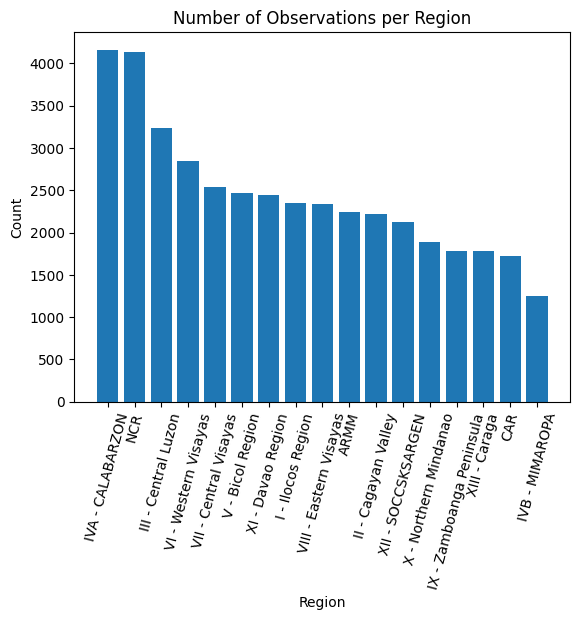

In [22]:
region_counts = fie_df['Region'].value_counts()

plt.bar(region_counts.index, region_counts.values)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Observations per Region')

plt.xticks(rotation=75)
plt.show()

### 2. Distribution of Household Head Age

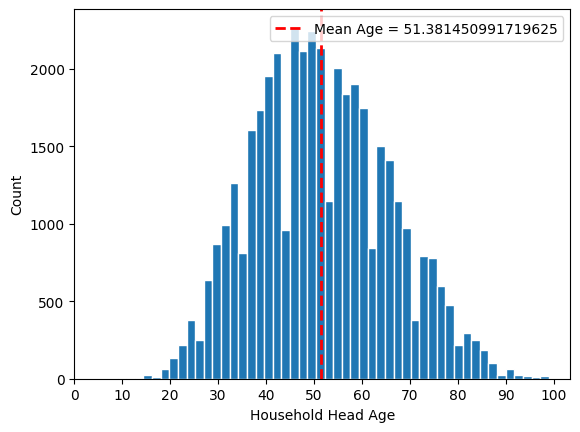

In [23]:
data = fie_df['Household Head Age']
mean_age = data.mean()

plt.hist(data, bins=50, edgecolor='w')

x_axis_labels = range(0, 101, 10)
plt.xticks(x_axis_labels)
plt.xlabel('Household Head Age')
plt.ylabel('Count')

plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age = {mean_age}')

plt.legend()
plt.show()

### 3. Ratio of Male to Female Household Heads

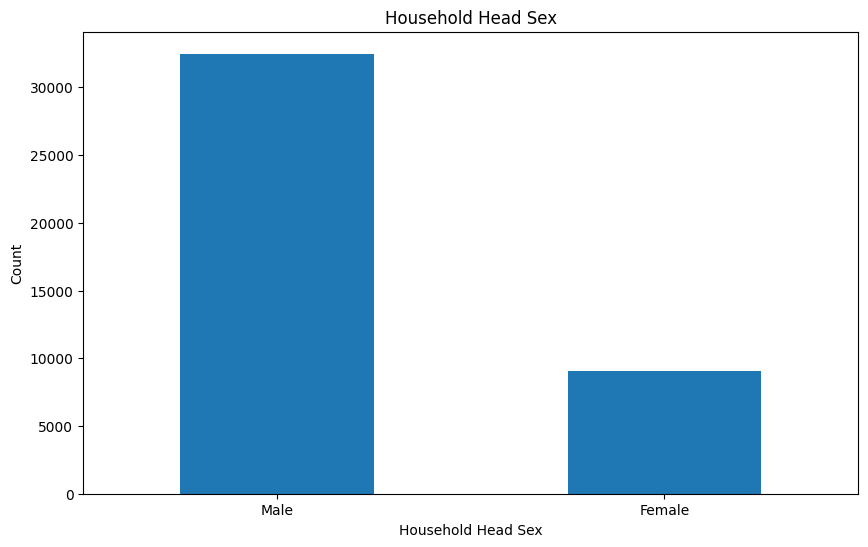

In [24]:
hhs_counts = fie_df['Household Head Sex'].value_counts()
plt.figure(figsize=(10,6))
hhs_counts.plot(kind='bar', rot=0)
plt.xlabel('Household Head Sex')
plt.ylabel('Count')
plt.title('Household Head Sex')
plt.show()

### 4. Ratio of Male to Female Per Class of Worker

In [ ]:
grouped = fie_df.groupby(['Household Head Class of Worker', 'Household Head Sex']).size().unstack(fill_value=0)
sex_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(sex_totals, axis=0)
grouped_ratio

ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Household Head Class of Worker')
ax.set_ylabel('Ratio of Household Head Sex')
ax.set_title('Ratio of Sex Per Class of Worker')
plt. legend(title='Household Head Sex', loc='upper right')

plt.show()

### 5. Average Total Household Income Per Region

In [ ]:
income_mean = fie_df.groupby('Region').agg({'Total Household Income': ['mean']})
income_mean.sort_values(by=('Total Household Income', 'mean'), ascending=False)

In [ ]:
income_mean = income_mean.sort_values(by=('Total Household Income', 'mean'), ascending=False) 
income_mean.plot(kind='bar', legend=None)
plt.xlabel('Region')
plt.ylabel('Average Total Household Income')
plt.title('Average Total Household Income Per Region')

### 6. Household Head Employment Rate Per Region - todo: change to employment rate of families?

In [ ]:
grouped = fie_df.groupby(['Region', 'Household Head Job or Business Indicator']).size().unstack(fill_value=0)
employment_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(employment_totals, axis=0)
grouped_ratio

ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Region')
ax.set_ylabel('Ratio of Employment')
ax.set_title('Ratio of Employment Per Region')
plt. legend(title='Employment', loc='upper right')

## EDA Question #2

The second EDA question aims to identify the characteristics of the different income classes.

Specifically, we aim to answer the following questions:
1. What is the distribution of households per income class?
2. What is the distribution of total household income of each income class?
3. What is the proportion of educational attainment of household heads per income class?
4. What is the proportion of main source of income per income class?
5. What is the proportion of class of worker of household heads per income class?
6. What are the occupations of the household heads of the top 5 poorest and richest households?

### 1. Distribution of Households Per Income Class

In [ ]:
value_counts = fie_df['Income Class'].value_counts()
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]
sorted_value_counts = value_counts.reindex(custom_order)
sorted_value_counts

In [ ]:
plt.bar(sorted_value_counts.index, sorted_value_counts.values)
plt.xlabel('Count')
plt.ylabel('Income Class')
plt.title('Income Distribution')
plt.xticks(rotation=90)  
plt.show()

### 2. Distribution of Total Household Income per Income Class

In [ ]:
income_df = fie_df[['Total Household Income', 'Income Class']]

# Define the order of income classes
income_class_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

# Reorder the 'Income Class' column based on the defined order
income_df['Income Class'] = pd.Categorical(income_df['Income Class'], categories=income_class_order, ordered=True)

income_df.boxplot('Total Household Income', by='Income Class', figsize=(15,10))
plt.title('Total Household Income by Income Class')
plt.show()

### 3. Proportion of Household Head Educational Attainment By Income Class

In [ ]:
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

grouped = fie_df.groupby(['Income Class', 'Household Head Highest Grade Completed']).size().unstack(fill_value=0)
grouped = grouped.reindex(custom_order)
educ_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(educ_totals, axis=0)
ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Income Class')
ax.set_ylabel('Ratio')
ax.set_title('Proportion of Household Head Educational Attainment by Income Class')
plt.legend(title='Educational Attainment', loc='upper right')

plt.show()

### 4. Proportion of Main Source of Income By Income Class

In [ ]:
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

grouped = fie_df.groupby(['Income Class', 'Main Source of Income']).size().unstack(fill_value=0)
grouped = grouped.reindex(custom_order)
class_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(class_totals, axis=0)

ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Income Class')
ax.set_ylabel('Ratio of Main Source of Income')
ax.set_title('Proportion of Main Source of Income By Income Class')
plt.legend(title='Main Source of Income', loc='upper right')

plt.show()

### 5. Proportion of Household Head Class of Worker Per Income Class

In [ ]:
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

grouped = fie_df.groupby(['Income Class', 'Household Head Class of Worker']).size().unstack(fill_value=0)
grouped = grouped.reindex(custom_order)
class_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(class_totals, axis=0)

ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Income Class')
ax.set_ylabel('Ratio of Household Head Class of Worker')
ax.set_title('Proportion of Household Head Class of Worker By Income Class')
plt.legend(title='Household Head Class of Worker', loc='upper right')

plt.show()

### 6. Household Head Occupations of Top 5 Poorest and Richest Households

In [ ]:
top_5_poorest = fie_df.nsmallest(5, 'Total Household Income')

# Get the Top 5 richest households based on 'Household Income'
top_5_richest = fie_df.nlargest(5, 'Total Household Income')

# Extract occupations of household heads for the Top 5 Poorest and Richest households
occupations_poorest = top_5_poorest['Household Head Occupation']
occupations_richest = top_5_richest['Household Head Occupation']

# Display the results
print("Top 5 Poorest Household Head Occupations:")
print(occupations_poorest)

print("\nTop 5 Richest Household Head Occupations:")
print(occupations_richest)

## EDA Question #3

The third EDA question aims to distinguish the expenditure pattern among the different income classes by answering the following questions:
1. What is the relationship between income and expense?
2. What are the expenditure proportions of each income class across different expense categories?

### 1. Relationship Between Income and Expense

In [ ]:
expenses = [
    'Total Food Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

total_expense = fie_df[expenses].sum(axis=1)
plt.scatter(fie_df['Total Household Income'], total_expense, color='b', alpha=0.5)  # Use alpha to adjust point transparency


# Labeling the axes and title
plt.xlabel('Total Household Income')
plt.ylabel('Total Expenditure')
plt.title('Total Expenditure by Total Household Income')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

### 2. Expenditure Proportions Per Income Class

In [ ]:
expenses = [
    'Total Food Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

expense_scatter = fie_df.groupby("Income Class")[expenses].mean().round(2).sort_values(by=expenses, ascending=False)
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]
expense_scatter = expense_scatter.reindex(custom_order)

ax = expense_scatter.plot(kind='bar', rot=70, stacked=True, figsize=(10,6))
ax.set_xlabel('Income Class')
ax.set_ylabel('Total of the Average Expense Per Category')
ax.set_title('Expenses Per Income Class')
plt.legend(title='Expense Categories', loc='upper right')

plt.show()

# References
Philippine Statistics Authority. (2017). 2015 Family income and expenditure survey. https://library.psa.gov.ph/cgi-bin/koha/opac-detail.pl?biblionumber=15585 

# Data Transformation

## Dropping of Irrelevant Variables

In [25]:
fie_df = fie_df.drop(['Household Head Job or Business Indicator', 'Total Household Income'], axis=1)
fie_df.shape

(41544, 58)

## One Hot Encoding of Nominal Variables

### Preprocessing

In [26]:
# Others
fie_df['Toilet Facilities'] = fie_df['Toilet Facilities'].replace('Others', 'Others - Toilet Facilities')
fie_df['Main Source of Water Supply'] = fie_df['Main Source of Water Supply'].replace('Others', 'Others - Water Supply')

# Unemployed
fie_df['Household Head Occupation'] = fie_df['Household Head Occupation'].replace('Unemployed', 'Unemployed - HHO')
fie_df['Household Head Class of Worker'] = fie_df['Household Head Class of Worker'].replace('Unemployed', 'Unemployed - HHCW')

# Not Applicable
fie_df['Type of Roof'] = fie_df['Type of Roof'].replace('Not Applicable', 'Not Applicable - Roof')
fie_df['Type of Walls'] = fie_df['Type of Walls'].replace('Not Applicable', 'Not Applicable - Walls')
fie_df['Tenure Status'] = fie_df['Tenure Status'].replace('Not Applicable', 'Not Applicable - Tenure Status')

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
fie_df.dtypes

Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                          int64
Transportation Expenditure                        int64
Communication Expenditure                       

In [29]:
ohe = OneHotEncoder()

In [30]:
object_columns = fie_df.select_dtypes(include=['object']).columns
ordinal_object_columns = ['Household Head Highest Grade Completed', 'Income Class'] 
nominal_object_columns = object_columns[~object_columns.isin(ordinal_object_columns)]
nominal_object_columns

Index(['Region', 'Main Source of Income', 'Household Head Sex',
       'Household Head Marital Status', 'Household Head Occupation',
       'Household Head Class of Worker', 'Type of Household',
       'Type of Building/House', 'Type of Roof', 'Type of Walls',
       'Tenure Status', 'Toilet Facilities', 'Main Source of Water Supply'],
      dtype='object')

In [31]:
feature_array = ohe.fit_transform(fie_df[nominal_object_columns]).toarray()

In [32]:
ohe.categories_

[array(['ARMM', 'CAR', 'I - Ilocos Region', 'II - Cagayan Valley',
        'III - Central Luzon', 'IVA - CALABARZON', 'IVB - MIMAROPA',
        'IX - Zamboanga Peninsula', 'NCR', 'V - Bicol Region',
        'VI - Western Visayas', 'VII - Central Visayas',
        'VIII - Eastern Visayas', 'X - Northern Mindanao',
        'XI - Davao Region', 'XII - SOCCSKSARGEN', 'XIII - Caraga'],
       dtype=object),
 array(['Enterpreneurial Activities', 'Other sources of Income',
        'Wage/Salaries'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Annulled', 'Divorced/Separated', 'Married', 'Single', 'Unknown',
        'Widowed'], dtype=object),
 array(['Accountants and auditors', 'Accounting and bookkeeping clerks',
        'Administrative secretaries and related associate professionals',
        'Advertising and public relations managers',
        'Agricultural or industrial machinery mechanics and fitters',
        'Agronomists and related scientists',
        'Air traffic 

In [33]:
feature_labels = ohe.categories_

In [34]:
feature_labels = np.array(feature_labels, dtype='object').ravel()
flattened_feature_labels = np.concatenate(feature_labels)

In [35]:
print(flattened_feature_labels)

['ARMM' 'CAR' 'I - Ilocos Region' 'II - Cagayan Valley'
 'III - Central Luzon' 'IVA - CALABARZON' 'IVB - MIMAROPA'
 'IX - Zamboanga Peninsula' 'NCR' 'V - Bicol Region'
 'VI - Western Visayas' 'VII - Central Visayas' 'VIII - Eastern Visayas'
 'X - Northern Mindanao' 'XI - Davao Region' 'XII - SOCCSKSARGEN'
 'XIII - Caraga' 'Enterpreneurial Activities' 'Other sources of Income'
 'Wage/Salaries' 'Female' 'Male' 'Annulled' 'Divorced/Separated' 'Married'
 'Single' 'Unknown' 'Widowed' 'Accountants and auditors'
 'Accounting and bookkeeping clerks'
 'Administrative secretaries and related associate professionals'
 'Advertising and public relations managers'
 'Agricultural or industrial machinery mechanics and fitters'
 'Agronomists and related scientists' 'Air traffic safety technicians'
 'Air transport service supervisors'
 'Aircraft engine mechanics and fitters'
 'Aircraft pilots, navigators and flight engineers'
 'Appraisers and valuers' 'Architects' 'Assembling laborers'
 'Athletes and re

In [36]:
features = pd.DataFrame(feature_array, columns = flattened_feature_labels)

In [37]:
features.head()

,ARMM,CAR,I - Ilocos Region,II - Cagayan Valley,III - Central Luzon,IVA - CALABARZON,IVB - MIMAROPA,IX - Zamboanga Peninsula,NCR,V - Bicol Region,...,"Lake, river, rain and others",Others - Water Supply,"Own use, faucet, community water system","Own use, tubed/piped deep well",Peddler,"Protected spring, river, stream, etc","Shared, faucet, community water system","Shared, tubed/piped deep well",Tubed/piped shallow well,"Unprotected spring, river, stream, etc"
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
int_df = fie_df.select_dtypes(include=['int64'])
excluded_df = fie_df[ordinal_object_columns]
encoded_fie_df = pd.concat([features, int_df, excluded_df], axis=1)

## Label Encoding of Ordinal Variables

In [39]:
income_class_labels = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]
highest_grade_completed_labels = ['No Grade Completed', 'Preschool', 'Primary Level', 'Secondary Level', 'Tertiary Level', 'Post Baccalaureate']

income_class_custom_mapping = {label: idx for idx, label in enumerate(income_class_labels)}
highest_grade_completed_custom_mapping = {label: idx for idx, label in enumerate(highest_grade_completed_labels)}

# Transform your data using the custom mapping
encoded_fie_df[ordinal_object_columns[0]] = fie_df[ordinal_object_columns[0]].map(highest_grade_completed_custom_mapping)
encoded_fie_df[ordinal_object_columns[1]] = fie_df[ordinal_object_columns[1]].map(income_class_custom_mapping)

# Feature Selection

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier 


In [41]:
encoded_fie_df

,ARMM,CAR,I - Ilocos Region,II - Cagayan Valley,III - Central Luzon,IVA - CALABARZON,IVB - MIMAROPA,IX - Zamboanga Peninsula,NCR,V - Bicol Region,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household Head Highest Grade Completed,Income Class
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,2,1,0,0,1,4,4
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,3,1,0,0,2,4,2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,2,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,3,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,2,1
41540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,3,0,0,0,0,2,2
41541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,2,2
41542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,2,0,0,0,0,3,1


In [42]:
X = encoded_fie_df.iloc[:, :-1]
y = encoded_fie_df.iloc[:, -1:].values.ravel()

## 1. Complete Features - Hannah

### A. KNN

In [44]:
model = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(estimator=model, X=X, y=y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      3282
           1       0.69      0.77      0.73     12299
           2       0.68      0.70      0.69     13989
           3       0.60      0.55      0.57      7077
           4       0.57      0.45      0.50      3389
           5       0.55      0.33      0.41      1108
           6       0.86      0.42      0.56       400

    accuracy                           0.66     41544
   macro avg       0.66      0.56      0.59     41544
weighted avg       0.66      0.66      0.66     41544



### B. SVM

In [45]:
model = svm.SVC()
y_pred = cross_val_predict(estimator=model, X=X, y=y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72      3282
           1       0.74      0.81      0.77     12299
           2       0.74      0.76      0.75     13989
           3       0.67      0.66      0.66      7077
           4       0.65      0.56      0.60      3389
           5       0.63      0.41      0.50      1108
           6       0.78      0.51      0.62       400

    accuracy                           0.72     41544
   macro avg       0.71      0.62      0.66     41544
weighted avg       0.72      0.72      0.72     41544



### C. MLP

In [44]:
model = MLPClassifier(random_state=1, max_iter=300)
y_pred = cross_val_predict(estimator=model, X=X, y=y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      3282
           1       0.71      0.70      0.71     12299
           2       0.68      0.70      0.69     13989
           3       0.61      0.47      0.53      7077
           4       0.42      0.65      0.51      3389
           5       0.41      0.18      0.25      1108
           6       0.43      0.51      0.46       400

    accuracy                           0.64     41544
   macro avg       0.56      0.55      0.55     41544
weighted avg       0.65      0.64      0.64     41544



### D. DT

## 2. PCA Components as New Features - Hannah

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.23917951,  4.80452685, -0.24475308, ..., -0.10315875,
         1.27169261,  1.36935969],
       [-0.23917951,  4.80452685, -0.24475308, ..., -0.10315875,
         3.06251996,  1.36935969],
       [-0.23917951,  4.80452685, -0.24475308, ..., -0.10315875,
        -0.51913474, -0.81212198],
       ...,
       [-0.23917951, -0.20813704, -0.24475308, ..., -0.10315875,
        -0.51913474, -0.81212198],
       [-0.23917951, -0.20813704, -0.24475308, ..., -0.10315875,
        -0.51913474,  0.27861886],
       [-0.23917951, -0.20813704, -0.24475308, ..., -0.10315875,
        -0.51913474, -2.99360365]])

In [49]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(41544, 442)

### A. KNN

In [50]:
model = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(estimator=model, X=X_pca, y=y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.31      0.34      3282
           1       0.47      0.55      0.51     12299
           2       0.46      0.53      0.49     13989
           3       0.41      0.33      0.37      7077
           4       0.46      0.30      0.36      3389
           5       0.45      0.18      0.26      1108
           6       0.76      0.20      0.32       400

    accuracy                           0.45     41544
   macro avg       0.48      0.34      0.38     41544
weighted avg       0.45      0.45      0.44     41544



### B. SVM

In [49]:
model = svm.SVC()
y_pred = cross_val_predict(estimator=model, X=X_pca, y=y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59      3282
           1       0.67      0.73      0.70     12299
           2       0.65      0.71      0.68     13989
           3       0.59      0.58      0.59      7077
           4       0.56      0.51      0.53      3389
           5       0.52      0.28      0.36      1108
           6       0.74      0.23      0.35       400

    accuracy                           0.64     41544
   macro avg       0.64      0.51      0.54     41544
weighted avg       0.64      0.64      0.64     41544



### C. MLP

In [50]:
model = MLPClassifier(random_state=1, max_iter=300)
y_pred = cross_val_predict(estimator=model, X=X_pca, y=y, cv=10)
print(classification_report(y, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


: 

### D. DT

## 3. Features selected from PCA Components - Hannah

In [51]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(41544, 442)

In [57]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

In [62]:
cumulative_variance

array([0.02603946, 0.03720906, 0.04601674, 0.05307347, 0.05931996,
       0.06452229, 0.06894081, 0.07308476, 0.07717177, 0.08095423,
       0.08454767, 0.08801458, 0.09146523, 0.09483072, 0.09809221,
       0.10119989, 0.10429301, 0.10734163, 0.11036774, 0.11333254,
       0.11624894, 0.11909678, 0.12187296, 0.12461726, 0.12732889,
       0.12998652, 0.1326238 , 0.13524063, 0.13782546, 0.1403649 ,
       0.14287594, 0.14535543, 0.14780877, 0.15024681, 0.15264037,
       0.15501803, 0.15738245, 0.15974054, 0.16208629, 0.16441729,
       0.1667319 , 0.16903873, 0.17132523, 0.17360554, 0.17587066,
       0.17813027, 0.18037669, 0.18261537, 0.18484094, 0.18705381,
       0.18925468, 0.19144186, 0.19362618, 0.19580774, 0.19798156,
       0.20014203, 0.20229065, 0.20442993, 0.20656646, 0.20869426,
       0.21081353, 0.21292334, 0.21502749, 0.2171265 , 0.21921552,
       0.22129903, 0.22337629, 0.22544405, 0.22750991, 0.22957032,
       0.23162672, 0.23367489, 0.23572151, 0.23776041, 0.23979

In [61]:
loadings = pd.DataFrame(pca.components_.T, index=X.columns)

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
ARMM,-0.054857,0.064684,0.169813,-0.041499,0.084786,0.099944,-0.007918,0.208490,-0.157851,0.049506,...,0.024369,-0.011103,-0.008260,-0.022628,-0.026355,0.090847,0.017993,-0.032403,-0.031073,-0.022384
CAR,0.007033,-0.006642,0.032415,0.001456,-0.059537,0.019043,-0.034833,0.105767,-0.012262,0.152105,...,0.057031,-0.009216,-0.062398,0.092373,-0.100285,0.035057,0.046335,0.048478,0.127481,0.021374
I - Ilocos Region,0.003438,-0.025498,0.000324,0.021516,-0.083174,-0.048972,-0.000845,0.013679,0.112392,0.039165,...,0.017124,-0.052713,-0.016395,-0.069711,0.022860,0.061881,-0.015072,-0.026041,0.095011,-0.030205
II - Cagayan Valley,-0.004554,-0.005207,0.021734,-0.001432,-0.134716,-0.106134,-0.064660,0.160962,0.223276,0.068136,...,-0.015746,0.054290,0.025677,0.030254,0.080432,-0.074422,0.038596,0.028673,0.004032,-0.001857
III - Central Luzon,0.029916,-0.016645,-0.030883,0.021765,-0.073092,-0.008087,0.026483,0.027369,0.072260,-0.023224,...,0.066051,0.027706,0.030793,-0.025674,0.019006,-0.038317,-0.042434,0.054648,0.006630,0.000624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Number of Personal Computer,0.186348,-0.000023,0.041151,-0.053002,0.089124,-0.067808,-0.027858,-0.002325,-0.007533,0.026172,...,0.019936,0.021774,-0.004491,0.015026,0.004419,-0.035337,0.048889,0.033394,0.008813,-0.037817
Number of Stove with Oven/Gas Range,0.134990,-0.033109,0.039078,-0.050662,0.032995,-0.073959,-0.010013,-0.047400,-0.039118,0.011842,...,0.042791,-0.014737,0.017940,-0.006887,-0.002157,-0.168578,0.175521,0.063264,0.004769,-0.127394
Number of Motorized Banca,-0.004742,0.027540,0.059992,0.004126,0.022457,0.041046,0.015450,-0.018771,-0.072378,-0.038366,...,-0.199278,0.028958,-0.007804,0.174317,0.100953,-0.098864,-0.110749,0.268101,0.014814,0.158128
Number of Motorcycle/Tricycle,0.088296,0.061701,0.047020,0.008592,-0.145399,-0.063947,-0.085852,-0.098331,0.054829,0.076515,...,-0.013944,0.021080,0.051943,0.063687,-0.162535,-0.105766,-0.092314,0.118377,-0.068446,-0.143123


### A. KNN

### B. SVM

### C. MLP

### D. DT

## 4. Forward Selection

## 5. Decision Tree

# Data Visualization - Hannah

K Means + SOM

# DRAFT

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = encoded_fie_df.iloc[:, :-1]
y = encoded_fie_df.iloc[:, -1:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)